### Import Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix 
from sklearn import model_selection 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.model_selection import KFold
%matplotlib inline

### Reading BRCA1 dataset

In [3]:
dataset = pd.read_csv('brca1.csv')
dataset

,Location,Mutation Type,Nucleotide Change,Classification,Posterior Probability
0,Exon 2,Start Loss,c.1A>G,5 - Definitely pathogenic,0.990000
1,Exon 2,Start Loss,c.2T>C,5 - Definitely pathogenic,0.990000
2,Exon 2,Start Loss,c.2T>G,5 - Definitely pathogenic,0.990000
3,Exon 2,Start Loss,c.3G>C,5 - Definitely pathogenic,0.990000
4,Exon 2,Start Loss,c.3G>T,5 - Definitely pathogenic,0.990000
...,...,...,...,...,...
816,Exon 11,Missense,c.3713C>T,1 - Not pathogenic or of no clinical significance,0.000000
817,Exon 11,Missense,c.3797G>C,1 - Not pathogenic or of no clinical significance,0.000000
818,Exon 11,Missense,c.3800T>C,2 - Likely not pathogenic or of little clinica...,0.004267
819,Exon 11,Missense,c.3818A>G,3 - Uncertain,0.169786


In [4]:
dataset.describe()

,Posterior Probability
count,821.000000
mean,0.723733
std,0.434893
min,0.000000
25%,0.051954
50%,0.990000
75%,0.990000
max,1.000000


In [5]:
print(dataset.groupby('Classification').size())

Classification
1 - Not pathogenic or of no clinical significance                94
2 - Likely not pathogenic or of little clinical significance    106
3 - Uncertain                                                    27
4 - Likely Pathogenic                                             1
5 - Definitely pathogenic                                       593
dtype: int64


In [6]:
print(dataset.groupby('Mutation Type').size())

Mutation Type
Deletion       265
Insertion      120
Missense       248
Nonsense       104
Splice Site     79
Start Loss       5
dtype: int64


In [7]:
print(dataset.groupby('Location').size())

Location
Exon 10        8
Exon 11      497
Exon 2        46
Exon 3        34
Exon 5        44
Exon 6        23
Exon 7        44
Exon 8        35
Exon 9         4
Intron 10      5
Intron 2      20
Intron 3      33
Intron 5      11
Intron 6       7
Intron 7       5
Intron 8       3
Intron 9       2
dtype: int64


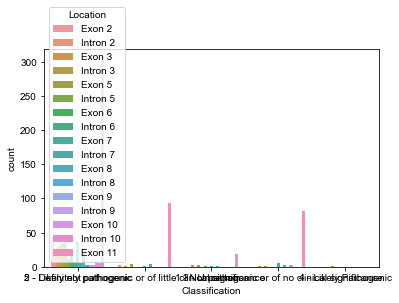

In [8]:
sns.countplot(x="Classification",hue="Location", data=dataset)
sns.set(rc={'figure.figsize':(50,30)})

In [9]:
dataset.dtypes

Location                  object
Mutation Type             object
Nucleotide Change         object
Classification            object
Posterior Probability    float64
dtype: object

#### Converting the data to numerical 

In [10]:
#transforming string values to numric
def trans_location(l):
    if l=='Exon 2':
        return 2.0
    if l=='Exon 3':
        return 3.0
    if l=='Exon 5':
        return 5.0
    if l=='Exon 6':
        return 6.0    
    if l=='Exon 7':
        return 7.0
    if l=='Exon 8':
        return 8.0
    if l=='Exon 9':
        return 9.0
    if l=='Exon 10':
        return 10.0
    if l=='Exon 11':
        return 11.0
    if l=='Intron 2':
        return 2.2
    if l=='Intron 3':
        return 3.2
    if l=='Intron 5':
        return 5.2
    if l=='Intron 6':
        return 6.2
    if l=='Intron 7':
        return 7.2
    if l=='Intron 8':
        return 8.2
    if l=='Intron 9':
        return 9.2
    if l=='Intron 10':
        return 10.2

def trans_mutationtype(m):
    if m=='Deletion':
        return 1.0
    if m=='Insertion':
        return 2.0
    if m=='Missense':
        return 3.0
    if m=='Nonsense':
        return 4.0
    if m=='Splice Site':
        return 5.0
    if m=='Start Loss':
        return 6.0

def trans_classification(c):
    if c=='1 - Not pathogenic or of no clinical significance':
        return 1.0
    if c=='2 - Likely not pathogenic or of little clinical significance':
        return 2.0
    if c=='3 - Uncertain':
        return 3.0
    if c=='4 - Likely Pathogenic':
        return 4.0
    if c=='5 - Definitely pathogenic':
        return 5.0

In [11]:
dataset['Location']=dataset['Location'].apply(trans_location)
dataset['Mutation Type']=dataset['Mutation Type'].apply(trans_mutationtype)
dataset['Classification']=dataset['Classification'].apply(trans_classification)
dataset.head()

,Location,Mutation Type,Nucleotide Change,Classification,Posterior Probability
0,2.0,6.0,c.1A>G,5.0,0.99
1,2.0,6.0,c.2T>C,5.0,0.99
2,2.0,6.0,c.2T>G,5.0,0.99
3,2.0,6.0,c.3G>C,5.0,0.99
4,2.0,6.0,c.3G>T,5.0,0.99


In [12]:
#drop Nucleotide Change coloumn 
dset = dataset.drop(['Nucleotide Change'], axis=1)
dset.head()

,Location,Mutation Type,Classification,Posterior Probability
0,2.0,6.0,5.0,0.99
1,2.0,6.0,5.0,0.99
2,2.0,6.0,5.0,0.99
3,2.0,6.0,5.0,0.99
4,2.0,6.0,5.0,0.99


In [13]:
dset.dtypes

Location                 float64
Mutation Type            float64
Classification           float64
Posterior Probability    float64
dtype: object

## 1. Naïve Bayes:

In [14]:
from sklearn.model_selection import train_test_split 

In [15]:
X = dset.iloc[:,[0,1,3]].values
y = dset.iloc[:,2].values

In [16]:
X

array([[2.00000000e+00, 6.00000000e+00, 9.90000000e-01],
       [2.00000000e+00, 6.00000000e+00, 9.90000000e-01],
       [2.00000000e+00, 6.00000000e+00, 9.90000000e-01],
       ...,
       [1.10000000e+01, 3.00000000e+00, 4.26742500e-03],
       [1.10000000e+01, 3.00000000e+00, 1.69786372e-01],
       [1.10000000e+01, 3.00000000e+00, 7.72587100e-03]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [18]:
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [19]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)
print(y_pred)

[5. 5. 5. 5. 5. 5. 2. 3. 5. 5. 2. 5. 1. 2. 3. 5. 5. 5. 1. 5. 5. 5. 2. 5.
 5. 1. 5. 5. 1. 5. 5. 5. 5. 5. 5. 5. 5. 2. 2. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 2. 5. 5. 5. 5. 5. 5. 1. 5. 3. 2. 5. 5. 5. 5. 5. 5. 2. 2. 5.
 5. 2. 5. 1. 1. 5. 5. 5. 5. 5. 1. 5. 1. 2. 5. 5. 5. 5. 5. 5. 1. 5. 2. 3.
 1. 5. 5. 2. 2. 5. 5. 5. 2. 5. 5. 5. 5. 5. 5. 5. 5. 5. 2. 5. 1. 5. 2. 2.
 5. 1. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 2. 5. 1. 2. 5. 5. 5. 5. 1. 5. 5.
 5. 2. 5. 2. 1. 3. 5. 5. 5. 5. 5. 5. 2. 2. 2. 5. 5. 1. 5. 5. 2.]


In [20]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 17   0   0   0]
 [  0  27   2   0]
 [  0   0   2   0]
 [  0   0   1 116]]


In [21]:
#test
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))            

Correct predictions:  162
False predictions 3


Accuracy of the Naive Bayes Clasification is:  0.9818181818181818


## 2. KNN

In [22]:
# Load and prepare the dataset
X = dset.iloc[:,[0,1,3]].values # Extract the features (X) values
y = dset.iloc[:,2].values # Extract the target (y) values

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [24]:
# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5) # Initialize the KNN classifier with 5 neighbors
knn.fit(X_train, y_train) # Train the classifier on the training data

KNeighborsClassifier()

In [25]:
# Make predictions on the test data
y_pred = knn.predict(X_test)

In [26]:
# Evaluate the classifier's performance using accuracy score
accuracy = accuracy_score(y_test, y_pred)

In [27]:
# Print the results to the console
print('Accuracy of KNN Classification: ', accuracy)

Accuracy of KNN Classification:  0.9757575757575757


## 3. SVM

In [28]:
from sklearn.svm import SVC

In [29]:
# Load and prepare the dataset
X = dset.iloc[:,[0,1,3]].values # Extract the features (X) values
y = dset.iloc[:,2].values # Extract the target (y) values

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [31]:
# Train the SVM classifier
svm = SVC(kernel='linear') # Initialize the SVM classifier with a linear kernel
svm.fit(X_train, y_train) # Train the classifier on the training data

SVC(kernel='linear')

In [32]:
# Make predictions on the test data
y_pred = svm.predict(X_test)

In [33]:
# Evaluate the classifier's performance using accuracy score
accuracy = accuracy_score(y_test, y_pred)

In [34]:
# Print the results to the console
print('Accuracy of SVM Classification: ', accuracy)

Accuracy of SVM Classification:  0.8242424242424242
